In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv("csvs/merged-df.csv")

In [3]:
sch_indep = ["grade9", "only_hs"]
per_indep = ["ell_percent", "sped_percent","asian_per",
             "black_per", "hispanic_per"]#,"white_per"]
num_indep = ["ell_num", "sped_num", "asian_num",
             "black_num","hispanic_num", "white_num"]
num_inv=[]
per_sqr=[]
for coln in num_indep:
    num_inv.append("inv_"+coln)
    df["inv_"+coln] = 1/(df[coln]+1)

for colp in per_indep:
    df[colp]=df[colp]/100
    df["sqr_"+colp]=df[colp]**2
    per_sqr.append("sqr_"+colp)

In [4]:
display(df.shape)
df["grad_per"]=df["Toal Grads #"]/df["grade9"]*100
awkdf = df[df["grad_per"]>=100]
df=df[df["grad_per"]<=100]
display(df.shape)

(2736, 60)

(2566, 61)

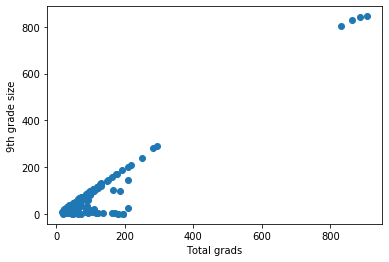

In [5]:
awkdf.describe()
plt.scatter(awkdf["Toal Grads #"],awkdf["grade9"])
plt.xlabel("Total grads")
plt.ylabel("9th grade size")
plt.savefig("graphs/error-data.png")

In [6]:
df.describe()

,Unnamed: 0,schoolyear,Cohort #,Toal Grads #,% of cohort,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,has_junior_high,total_students,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,inv_ell_num,inv_sped_num,inv_asian_num,inv_black_num,inv_hispanic_num,inv_white_num,sqr_ell_percent,sqr_sped_percent,sqr_asian_per,sqr_black_per,sqr_hispanic_per,grad_per
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.00000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000
mean,1381.466875,2008.164848,188.222136,144.673422,77.901832,33.212646,33.174591,827.199922,0.019486,0.469213,0.464926,0.467264,0.439205,0.455183,0.423227,11.775526,13.921668,13.787607,262.501559,226.705378,157.121200,138.64809,88.424006,0.116069,96.574435,0.125314,120.169525,0.083484,272.538581,0.391795,317.051832,0.431856,104.917381,7.676734,416.966485,49.051676,410.233048,50.948636,0.195635,827.199532,2.249805,0.488698,0.006235,0.010912,39.484801,0.799688,0.212783,0.099689,0.058647,0.150065,0.020529,0.009278,0.169721,0.044825,0.020017,0.022992,0.214842,0.241340,59.468728
std,782.266301,1.983093,221.476236,180.329874,15.075954,34.141560,37.332212,941.381390,0.575330,6.490571,6.408703,6.399645,6.063665,6.198231,5.855984,31.013213,33.945842,34.222294,313.247771,279.250376,201.734894,191.54543,159.025657,0.177103,110.749858,0.065688,323.447059,0.126605,329.817759,0.247715,376.472404,0.234227,292.041064,12.987077,504.214534,13.300857,465.780599,13.300765,0.396766,941.381317,30.481918,6.556671,0.078733,0.103909,96.341633,0.400312,0.451042,0.193947,0.156775,0.218853,0.097587,0.012898,0.225153,0.149531,0.018277,0.068209,0.238910,0.214446,20.218033
min,0.000000,2005.000000,6.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.024000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000705,0.001330,0.000311,0.000260,0.000344,0.000314,0.000000,0.000000,0.000000,0.000000,0.000576,0.000000
25%,712.250000,2006.000000,82.000000,60.000000,69.100000,0.000000,0.000000,338.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,88.000000,61.000000,43.00000,11.000000,0.026000,30.000000,0.084000,4.000000,0.012000,93.000000,0.217250,98.000000,0.210000,3.000000,0.900000,154.000000,43.700000,166.000000,45.600000,0.000000,338.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.013333,0.009639,0.016462,0.002994,0.002894,0.020408,0.000676,0.007056,0.000144,0.047198,0.044100,45.981673
50%,1376.500000,2008.000000,102.000000,78.000000,79.000000,23.950000,0.000000,450.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,117.000000,88.000000,77.00000,30.000000,0.061000,62.000000,0.128000,13.000000,0.027000,161.000000,0.340000,209.000000,0.464000,9.000000,2.000000,221.000000,49.200000,239.000000,50.800000,0.000000,4

In [7]:
independents = per_indep#+per_sqr#+sch_indep+num_inv
x_mega_train, x_holdout, y_mega_train, y_holdout = train_test_split(
                                                    df[independents],
                                                    df["grad_per"],
                                                    test_size=0.1)
x_train, x_test, y_train, y_test = train_test_split(x_mega_train,
                                                    y_mega_train,
                                                    test_size=0.2)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(x_train)

#transform the x data
x_train_s = pd.DataFrame(data=scaler.transform(x_mega_train), columns=x_mega_train.columns)
x_test_s = pd.DataFrame(data=scaler.transform(x_holdout), columns=x_holdout.columns)




In [9]:
lm_grad = LinearRegression()

lm_grad.fit(x_train_s,y_mega_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
basic_y_prediction = lm_grad.predict(x_test_s)
basic_y_prediction = list(map(lambda x: x if x<100 else 100, basic_y_prediction))
basic_rmse = np.sqrt(metrics.mean_squared_error(y_holdout, basic_y_prediction))
print("basic rmse", basic_rmse)

basic rmse 16.90180066321699


In [11]:
#basic_y_prediction = lm_grad.predict(x_test_s)
#basic_y_prediction = list(map(lambda x: x if x<100 else 100, basic_y_prediction))
x_test["null"] = y_train.mean()
basic_rmse = np.sqrt(metrics.mean_squared_error(y_test, x_test["null"]))
print("basic rmse", basic_rmse)

basic rmse 19.62213082757076


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
display(basic_y_prediction)

[52.952695816891534,
 53.16869114877407,
 71.93010132455684,
 46.91752433782527,
 56.28000631815111,
 49.53596588972321,
 57.16441869026657,
 55.06191968534786,
 53.95293396787688,
 44.8335937065542,
 36.671563591113696,
 49.543097497412695,
 73.6242493360919,
 51.44375852364156,
 74.23594493462964,
 55.97206122814151,
 54.12328616064801,
 83.81784774050678,
 49.793817359554964,
 56.528652328720625,
 46.910606441425735,
 55.46296244728086,
 58.17554616267236,
 55.889807650919586,
 63.685667733427145,
 52.893749899735404,
 42.57976261931442,
 46.80885845530015,
 75.01548826151507,
 57.85209813266953,
 53.17412739939498,
 78.93726181920644,
 59.621773902864994,
 69.62511424087148,
 67.72198912540851,
 50.349228423359335,
 55.02090241602431,
 60.88565309584447,
 71.15112086349397,
 56.247600532487795,
 38.26217618124717,
 42.36106302976721,
 46.36093608614785,
 62.19897559181996,
 55.58547787376699,
 57.111059871463844,
 57.72887940443737,
 52.84705790722507,
 72.62774396196058,
 72.72269

In [13]:
lm_grad.coef_

array([-3.95877863, -7.48895173, -1.55547561, -9.78214542, -7.0674896 ])

In [14]:
df[independents].describe()

,ell_percent,sped_percent,asian_per,black_per,hispanic_per
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000
mean,0.116069,0.125314,0.083484,0.391795,0.431856
std,0.177103,0.065688,0.126605,0.247715,0.234227
min,0.000000,0.000000,0.000000,0.000000,0.024000
25%,0.026000,0.084000,0.012000,0.217250,0.210000
50%,0.061000,0.128000,0.027000,0.340000,0.464000
75%,0.125000,0.169000,0.090000,0.535750,0.614000
max,1.000000,0.458000,0.899000,0.965000,1.000000


In [15]:
from statsmodels.formula.api import ols
colnames = "+".join(filter(lambda x: x not in ["grad_per",
                                               #"lat","long"
                                              ], x_train_s.columns))

full_train=pd.concat([y_mega_train,x_train_s],axis=1).rename({0:"grad_per"},axis=1)
olsstr = "grad_per~"+colnames
lr_model = ols(formula=olsstr, data=full_train).fit()
#full_train

lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               grad_per   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3936
Date:                Sun, 13 Sep 2020   Prob (F-statistic):              0.853
Time:                        23:34:13   Log-Likelihood:                -8604.9
No. Observations:                1952   AIC:                         1.722e+04
Df Residuals:                    1946   BIC:                         1.726e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       57.8900      0.451    128.435      0.000      57.006      58.774
ell_percent     -0.2929      0.574     -0.511      0.610      -1.418       0.832
sped_percent     0.4354      0.519      0.839      0.401      -0.582       1.453
asian_per        0.2607      0.815      0.320      0.749      -1.339       1.860
black_per       -0.3369      0.940     -0.358      0.720      -2.180       1.507
hispanic_per     0.1257      0.967      0.130      0.897      -1.771       2.022
==============================================================================
Omnibus:                       18.914   Durbin-Watson:                   0.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.011
Skew:                          -0.061   Prob(JB):                      0.00150
Kurtosis:                       2.619   Cond. No.                         4.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
basic_model_pred = lr_model.predict(x_test_s)
from sklearn.metrics import r2_score
r2_score(y_holdout,basic_model_pred)


-0.0166718064680611

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
viffactor = [variance_inflation_factor(x_train_s.values, i) for i in range(x_train_s.shape[1])]

vif = pd.DataFrame()
vif["VIF Factor"] = viffactor
#[variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = x_train_s.columns
vif=vif.round(1).sort_values("VIF Factor",ascending=False)
vif

,VIF Factor,features
4,4.8,hispanic_per
3,4.5,black_per
2,3.4,asian_per
0,1.5,ell_percent
1,1.4,sped_percent


In [18]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(x_mega_train)
poly2_columns = poly_2.get_feature_names(x_mega_train.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()


,ell_percent,sped_percent,asian_per,black_per,hispanic_per,ell_percent^2,ell_percent sped_percent,ell_percent asian_per,ell_percent black_per,ell_percent hispanic_per,sped_percent^2,sped_percent asian_per,sped_percent black_per,sped_percent hispanic_per,asian_per^2,asian_per black_per,asian_per hispanic_per,black_per^2,black_per hispanic_per,hispanic_per^2
0,0.101,0.179,0.019,0.355,0.611,0.010201,0.018079,0.001919,0.035855,0.061711,0.032041,0.003401,0.063545,0.109369,0.000361,0.006745,0.011609,0.126025,0.216905,0.373321
1,0.027,0.058,0.201,0.197,0.574,0.000729,0.001566,0.005427,0.005319,0.015498,0.003364,0.011658,0.011426,0.033292,0.040401,0.039597,0.115374,0.038809,0.113078,0.329476
2,0.040,0.135,0.065,0.267,0.645,0.001600,0.005400,0.002600,0.010680,0.025800,0.018225,0.008775,0.036045,0.087075,0.004225,0.017355,0.041925,0.071289,0.172215,0.416025
3,0.248,0.136,0.003,0.103,0.883,0.061504,0.033728,0.000744,0.025544,0.218984,0.018496,0.000408,0.014008,0.120088,0.000009,0.000309,0.002649,0.010609,0.090949,0.779689
4,0.028,0.156,0.010,0.764,0.206,0.000784,0.004368,0.000280,0.021392,0.005768,0.024336,0.001560,0.119184,0.032136,0.000100,0.007640,0.002060,0.583696,0.157384,0.042436


In [19]:
test_poly2_data = poly_2.fit_transform(x_holdout)
test_poly2_columns = poly_2.get_feature_names(x_holdout.columns)
test_poly2_df = pd.DataFrame(test_poly2_data, columns=test_poly2_columns)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
viffactor = [variance_inflation_factor(df_poly2.values, i) for i in range(df_poly2.shape[1])]

vif = pd.DataFrame()
vif["VIF Factor"] = viffactor
#[variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = df_poly2.columns
vif=vif.round(1).sort_values("VIF Factor",ascending=False)
vif = vif[vif["VIF Factor"]<50]
vif_features = vif["features"]
x_train_vif = df_poly2[vif_features]
vif

,VIF Factor,features
7,46.8,ell_percent asian_per
5,43.0,ell_percent^2
14,37.0,asian_per^2
16,34.6,asian_per hispanic_per
8,32.3,ell_percent black_per
10,27.8,sped_percent^2
15,14.7,asian_per black_per
6,12.8,ell_percent sped_percent
11,11.1,sped_percent asian_per


In [21]:
from sklearn.feature_selection import RFECV
ols = LinearRegression()

selector = RFECV(estimator=ols, min_features_to_select=5, step=1, cv=5,
                 scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
selector.fit(df_poly2, y_mega_train)


Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.


RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=5, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=2)

In [22]:
selected_rfe = df_poly2.columns[selector.support_]
removed_rfe = df_poly2.columns[~selector.support_]

In [23]:

lm_rfe = LinearRegression()

lm_rfe = lm_rfe.fit(df_poly2[selected_rfe], y_mega_train)

y_rfe = lm_rfe.predict(test_poly2_df[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_holdout, y_rfe))


print('holdout predicting rmse using rfe:' , trainRFE_rmse)



holdout predicting rmse using rfe: 15.986971276264965


In [24]:
lm_rfe.coef_

array([-167.66332799, -155.08136952,  -56.50367186, -112.71538708,
         -5.73745944,  136.68995836,   82.30611981,   53.30653242,
         83.98385248,  331.18785912,  118.49135116,  -87.83012977,
         61.64063854,  130.94950554,  -41.48786458,   85.67066573])

In [25]:
selected_rfe

Index(['ell_percent', 'sped_percent', 'asian_per', 'black_per', 'hispanic_per',
       'ell_percent^2', 'ell_percent sped_percent', 'ell_percent asian_per',
       'ell_percent black_per', 'sped_percent^2', 'sped_percent asian_per',
       'sped_percent black_per', 'asian_per^2', 'asian_per black_per',
       'asian_per hispanic_per', 'black_per^2'],
      dtype='object')

In [26]:
rfe_coef_df = pd.DataFrame()

In [27]:
rfe_coef_df["feature"] = selected_rfe
rfe_coef_df["coefficient"] = lm_rfe.coef_

In [28]:
rfe_coef_df

,feature,coefficient
0,ell_percent,-167.663328
1,sped_percent,-155.081370
2,asian_per,-56.503672
3,black_per,-112.715387
4,hispanic_per,-5.737459
5,ell_percent^2,136.689958
6,ell_percent sped_percent,82.306120
7,ell_percent asian_per,53.306532
8,ell_percent black_per,83.983852
9,sped_percent^2,331.187859


In [29]:
black_per_term = rfe_coef_df[rfe_coef_df["feature"]=="black_per"]#*.2#["coefficient"]
black2_term = rfe_coef_df[rfe_coef_df["feature"]=="black_per^2"]#*.2**2#["coefficient"]
print(sum(.9*black_per_term["coefficient"],.9**2*black2_term["coefficient"]))
print(.9*black_per_term["coefficient"])


15   -32.050609
Name: coefficient, dtype: float64
3   -101.443848
Name: coefficient, dtype: float64


In [30]:
black_per_term = rfe_coef_df[rfe_coef_df["feature"]=="black_per"]#*.2#["coefficient"]
black2_term = rfe_coef_df[rfe_coef_df["feature"]=="black_per^2"]#*.2**2#["coefficient"]
print(sum(.6*black_per_term["coefficient"],.6**2*black2_term["coefficient"]))
print(.6*black_per_term["coefficient"])

15   -36.787793
Name: coefficient, dtype: float64
3   -67.629232
Name: coefficient, dtype: float64


In [31]:
from sklearn.metrics import r2_score
r2_score(y_holdout,y_rfe)

0.33191788412088064

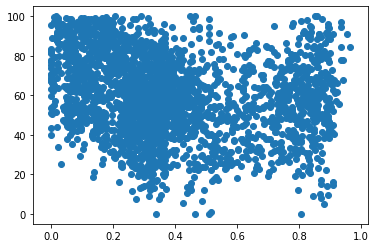

In [32]:
plt.scatter(df["black_per"],df["grad_per"])


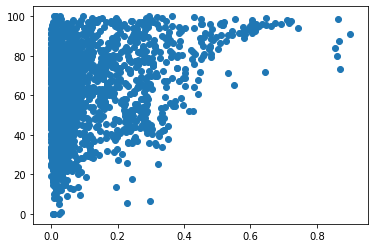

In [33]:
plt.scatter(df["asian_per"],df["grad_per"])

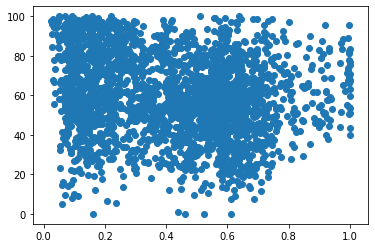

In [34]:
plt.scatter(df["hispanic_per"],df["grad_per"])

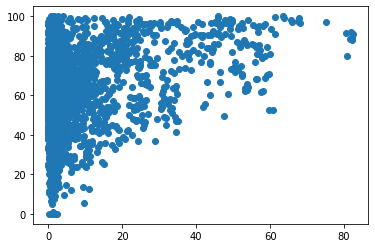

In [35]:
plt.scatter(df["white_per"],df["grad_per"])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


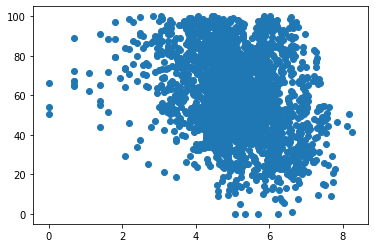

In [36]:
plt.scatter(np.log(df["black_num"]),df["grad_per"])


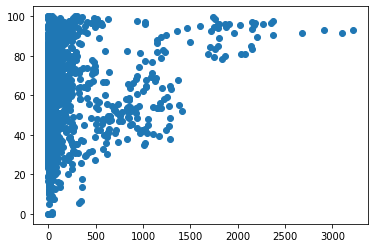

In [37]:
plt.scatter(df["asian_num"],df["grad_per"])

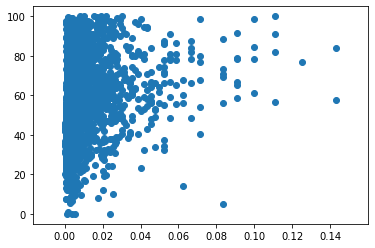

In [38]:
plt.scatter(1/df["hispanic_num"],df["grad_per"])

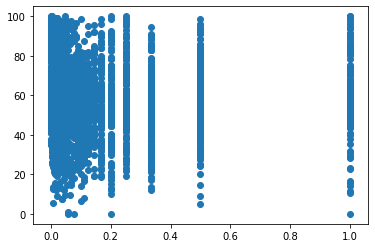

In [39]:
plt.scatter(1/df["white_num"],df["grad_per"])

In [40]:
df["white_num"].nunique()

431

In [41]:
df["black_num"].nunique()
df["hispanic_num"].nunique()

794

In [42]:
df[df["white_num"]<5]

,Unnamed: 0,DBN,schoolyear,Cohort #,Toal Grads #,% of cohort,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,has_junior_high,total_students,true,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,inv_ell_num,inv_sped_num,inv_asian_num,inv_black_num,inv_hispanic_num,inv_white_num,sqr_ell_percent,sqr_sped_percent,sqr_asian_per,sqr_black_per,sqr_hispanic_per,grad_per
93,93,02M303,2005,105,58,65.2,60.0,0.0,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,20.0,0.175,17.0,0.149,3,0.026,29,0.254,73,0.640,4,3.5,72.0,63.2,42.0,36.8,0,114.0,True,0.0,0.0,0,0,0.0,1,0,0.047619,0.055556,0.250000,0.033333,0.013514,0.200000,0.030625,0.022201,0.000676,0.064516,0.409600,50.877193
97,97,02M303,2009,98,66,68.0,0.0,85.9,401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.0,85.0,69.0,20.0,59.0,0.147,82.0,0.204,8,0.020,125,0.312,261,0.651,3,0.7,202.0,50.4,199.0,49.6,0,401.0,True,0.0,0.0,0,0,0.0,1,0,0.016667,0.012048,0.111111,0.007937,0.003817,0.250000,0.021609,0.041616,0.000400,0.097344,0.423801,29.074890
107,107,02M308,2005,67,56,86.2,60.0,0.0,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,1.0,0.012,14.0,0.169,7,0.084,39,0.470,30,0.361,3,3.6,37.0,44.6,46.0,55.4,0,83.0,True,0.0,0.0,0,0,0.0,1,0,0.500000,0.066667,0.125000,0.025000,0.032258,0.250000,0.000144,0.028561,0.007056,0.220900,0.130321,67.469880
121,121,02M316,2005,77,59,81.7,60.0,0.0,107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,0.0,0.0,1.0,0.009,11.0,0.103,1,0.009,26,0.243,68,0.636,3,2.8,0.0,0.0,107.0,100.0,0,107.0,True,0.0,0.0,0,0,0.0,1,0,0.500000,0.083333,0.500000,0.037037,0.014493,0.250000,0.000081,0.010609,0.000081,0.059049,0.404496,55.140187
122,122,02M316,2006,74,60,82.2,73.8,0.0,206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,93.0,0.0,0.0,8.0,0.039,17.0,0.083,7,0.034,72,0.350,111,0.539,3,1.5,0.0,0.0,206.0,100.0,0,206.0,True,0.0,0.0,0,0,0.0,1,0,0.111111,0.055556,0.125000,0.013699,0.008929,0.250000,0.001521,0.006889,0.001156,0.122500,0.290521,53.097345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2731,32K556,2007,138,83,65.4,86.6,0.0,458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,121.0,82.0,81.0,108.0,0.236,53.0,0.116,6,0.013,76,0.166,373,0.814,2,0.4,192.0,41.9,266.0,58.1,0,458.0,True,0.0,0.0,0,0,0.0,1,0,0.009174,0.018519,0.142857,0.012987,0.002674,0.333333,0.055696,0.013456,0.000169,0.027556,0.662596,47.701149
2732,2732,32K556,2008,110,60,56.1,86.4,0.0,489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,144.0,80.0,89.0,100.0,0.204,75.0,0.153,6,0.012,78,0.160,400,0.818,4,0.8,225.0,46.0,264.0,54.0,0,489.0,True,0.0,0.0,0,0,0.0,1,0,0.009901,0.013158,0.142857,0.012658,0.002494,0.200000,0.041616,0.023409,0.000144,0.025600,0.669124,34.090909
2733,2733,32K556,2009,110,80,76.2,0.0,94.4,481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,133.0,108.0,85.0,102.0,0.212,82.0,0.170,5,0.010,81,0.168,391,0.813,2,0.4,245.0,50.9,236.0,49.1,0,481.0,True,0.0,0.0,0,0,0.0,1,0,0.009709,0.012048,0.166667,0.012195,0.002551,0.333333,0.044944,0.028900,0.000100,0.028224,0.660969,51.612903
2734,2734,32K556,2010,110,82,81.2,0.0,96.7,500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,109.0,111.0,144.0,101.0,0.202,88.0,0.176,3,0.006,92,0.184,402,0.804,1,0.2,270.0,54.0,230.0,46.0,0,500.0,True,0.0,0.0,0,0,0.0,1,0,0.009804,0.011236,0.250000,0.010753,0.002481,0.500000,0.040804,0.030976,0.000036,0.033856,0.646416,60.294118


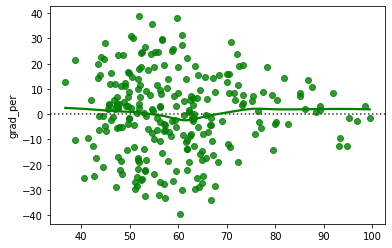

In [43]:
sns.residplot(y_rfe, y_holdout, lowess=True, color="g")

In [44]:
y_holdout.describe()

count    257.000000
mean      60.467176
std       19.597373
min       17.921147
25%       48.461538
50%       60.273973
75%       76.388889
max       99.137931
Name: grad_per, dtype: float64